In [1]:
# Yi-Lin Lou (Aaron) 301226659

import pandas as pd
import tensorflow as tf

#load the dataset

data_path = r'./data/default of credit card clients.xls'
df = pd.read_excel(data_path, header=0)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAYDELAY_MONTH1,PAYDELAY_MONTH2,PAYDELAY_MONTH3,PAYDELAY_MONTH4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,F,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29601 entries, 0 to 29600
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29601 non-null  int64 
 1   LIMIT_BAL                   29601 non-null  int64 
 2   SEX                         29601 non-null  object
 3   EDUCATION                   29601 non-null  object
 4   MARRIAGE                    29601 non-null  object
 5   AGE                         29601 non-null  int64 
 6   PAYDELAY_MONTH1             29601 non-null  int64 
 7   PAYDELAY_MONTH2             29601 non-null  int64 
 8   PAYDELAY_MONTH3             29601 non-null  int64 
 9   PAYDELAY_MONTH4             29601 non-null  int64 
 10  PAYDELAY_MONTH5             29601 non-null  int64 
 11  PAYDELAY_MONTH6             29601 non-null  int64 
 12  BILL_AMT1                   29601 non-null  int64 
 13  BILL_AMT2                   29601 non-null  in

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,29601.0,NaN,NaN,NaN,14971.758927,8660.18443,1.0,7474.0,14953.0,22463.0,30000.0
LIMIT_BAL,29601.0,NaN,NaN,NaN,167550.544914,129944.020953,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29601,2,F,17855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,29601,4,university,14024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,29601,3,single,15806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,29601.0,NaN,NaN,NaN,35.464072,9.213243,21.0,28.0,34.0,41.0,79.0
PAYDELAY_MONTH1,29601.0,NaN,NaN,NaN,-0.014932,1.124503,-2.0,-1.0,0.0,0.0,8.0
PAYDELAY_MONTH2,29601.0,NaN,NaN,NaN,-0.131313,1.199642,-2.0,-1.0,0.0,0.0,8.0
PAYDELAY_MONTH3,29601.0,NaN,NaN,NaN,-0.16344,1.199793,-2.0,-1.0,0.0,0.0,8.0
PAYDELAY_MONTH4,29601.0,NaN,NaN,NaN,-0.218303,1.17222,-2.0,-1.0,0.0,0.0,8.0


In [4]:
df['default payment next month'].value_counts()

default payment next month
0    22996
1     6605
Name: count, dtype: int64

In [5]:
df['EDUCATION'].value_counts()

EDUCATION
university         14024
graduate school    10581
high school         4873
others               123
Name: count, dtype: int64

In [6]:
df['SEX'].value_counts()

SEX
F    17855
M    11746
Name: count, dtype: int64

In [7]:
df['PAYDELAY_MONTH1'].value_counts()

PAYDELAY_MONTH1
 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: count, dtype: int64

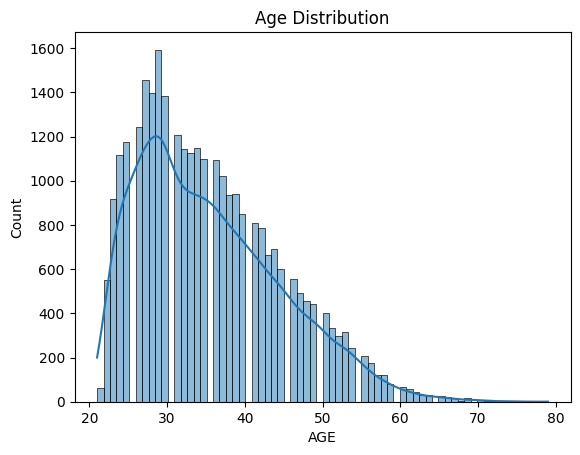

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# age histogram
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution')
plt.show()

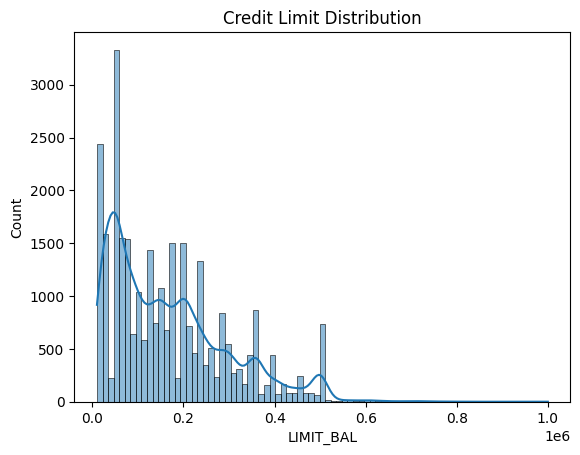

In [9]:
# credit limit histogram
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Credit Limit Distribution')
plt.show()

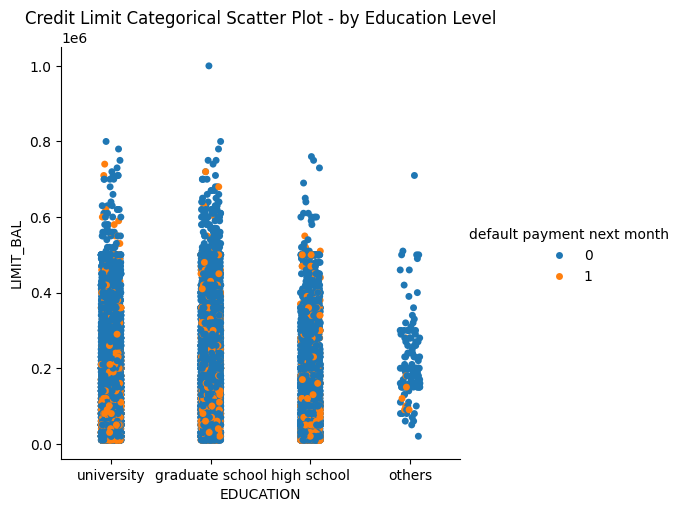

In [10]:
# cat plot for limit_bal
sns.catplot(data=df, x='EDUCATION', y='LIMIT_BAL', hue='default payment next month')
plt.title('Credit Limit Categorical Scatter Plot - by Education Level')
plt.show()

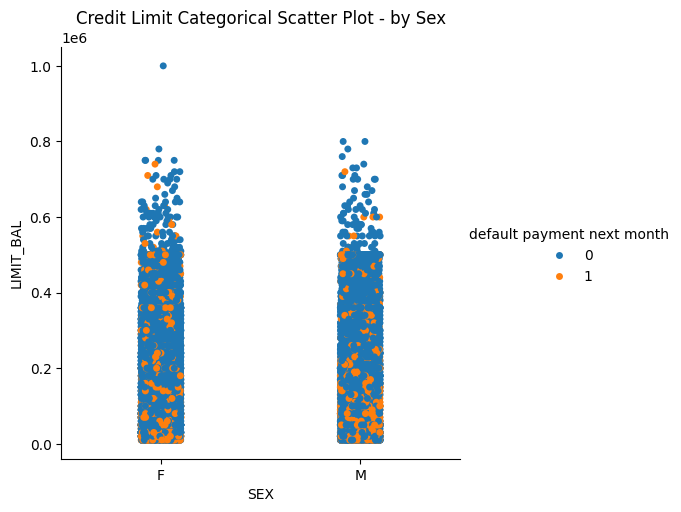

In [11]:
sns.catplot(data=df, x='SEX', y='LIMIT_BAL', hue='default payment next month')
plt.title('Credit Limit Categorical Scatter Plot - by Sex')
plt.show()

In [12]:
import numpy as np
# feature engineering

#binning selected numerical columns by percentile ranges

def bin_by_percentile(df, col_name, labels):
    percentile_cuts = [0, 25, 50, 75, 100]
    percentile_values = [np.percentile(df[col_name], percentile) for percentile in percentile_cuts]
    binned_column = pd.cut(df[col_name], bins=percentile_values, labels=labels, include_lowest=True)
    return binned_column


labels_lb = ['Below 50K', 'Between 50K and 140K', 'Between 140K and 240K', '240K and above']
df['LIMIT_BAL_Binned'] = bin_by_percentile(df, 'LIMIT_BAL', labels_lb)

df[['LIMIT_BAL', 'LIMIT_BAL_Binned']].head()


,LIMIT_BAL,LIMIT_BAL_Binned
0,20000,Below 50K
1,120000,Between 50K and 140K
2,90000,Between 50K and 140K
3,50000,Below 50K
4,50000,Below 50K


In [13]:
labels_age = ['0-25th percentile', 'between 25th and 50th percentile', 'between 50th and 75th percentile', '75th to 100th percentile']
df['AGE_Binned'] = bin_by_percentile(df, 'AGE', labels_age)

df[['AGE', 'AGE_Binned']].head()



,AGE,AGE_Binned
0,24,0-25th percentile
1,26,0-25th percentile
2,34,between 25th and 50th percentile
3,37,between 50th and 75th percentile
4,57,75th to 100th percentile


In [14]:
df_binned = df.drop(['LIMIT_BAL', 'AGE'], axis=1)
df_binned.head(5)

,ID,SEX,EDUCATION,MARRIAGE,PAYDELAY_MONTH1,PAYDELAY_MONTH2,PAYDELAY_MONTH3,PAYDELAY_MONTH4,PAYDELAY_MONTH5,PAYDELAY_MONTH6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL_Binned,AGE_Binned
0,1,F,university,married,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,1,Below 50K,0-25th percentile
1,2,F,university,single,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,1,Between 50K and 140K,0-25th percentile
2,3,F,university,single,0,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,Between 50K and 140K,between 25th and 50th percentile
3,4,F,university,married,0,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,Below 50K,between 50th and 75th percentile
4,5,M,university,married,-1,0,-1,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,Below 50K,75th to 100th percentile


In [15]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAYDELAY_MONTH1', 'PAYDELAY_MONTH2', 'PAYDELAY_MONTH3', 
                    'PAYDELAY_MONTH4', 'PAYDELAY_MONTH5', 'PAYDELAY_MONTH6','LIMIT_BAL_Binned', 'AGE_Binned']

numeric_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_binned[categorical_cols] = ordinal_encoder.fit_transform(df_binned[categorical_cols])

In [17]:
target='default payment next month'
features = df_binned.drop(['ID', target],axis=1)
labels = df_binned[target]

In [18]:
features.head(5)

,SEX,EDUCATION,MARRIAGE,PAYDELAY_MONTH1,PAYDELAY_MONTH2,PAYDELAY_MONTH3,PAYDELAY_MONTH4,PAYDELAY_MONTH5,PAYDELAY_MONTH6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL_Binned,AGE_Binned
0,0.0,3.0,0.0,4.0,4.0,1.0,1.0,0.0,-2,3913,...,0,0,0,689,0,0,0,0,1.0,0.0
1,0.0,3.0,2.0,1.0,4.0,2.0,2.0,2.0,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,3.0,0.0
2,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,3.0,2.0
3,0.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0,0,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,1.0,3.0
4,1.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0,8617,...,19146,19131,2000,36681,10000,9000,689,679,1.0,1.0


In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29601 entries, 0 to 29600
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               29601 non-null  float64
 1   EDUCATION         29601 non-null  float64
 2   MARRIAGE          29601 non-null  float64
 3   PAYDELAY_MONTH1   29601 non-null  float64
 4   PAYDELAY_MONTH2   29601 non-null  float64
 5   PAYDELAY_MONTH3   29601 non-null  float64
 6   PAYDELAY_MONTH4   29601 non-null  float64
 7   PAYDELAY_MONTH5   29601 non-null  float64
 8   PAYDELAY_MONTH6   29601 non-null  int64  
 9   BILL_AMT1         29601 non-null  int64  
 10  BILL_AMT2         29601 non-null  int64  
 11  BILL_AMT3         29601 non-null  int64  
 12  BILL_AMT4         29601 non-null  int64  
 13  BILL_AMT5         29601 non-null  int64  
 14  BILL_AMT6         29601 non-null  int64  
 15  PAY_AMT1          29601 non-null  int64  
 16  PAY_AMT2          29601 non-null  int64 

In [20]:
for num_col in numeric_cols:
    print(features[num_col].shape)  # Debugging line
    mean, variance = tf.nn.moments(features[num_col], axes=0)


(29601,)
(29601,)
(29601,)
(29601,)
(29601,)
(29601,)
(29601,)
(29601,)
(29601,)
(29601,)
(29601,)
(29601,)


In [21]:
# convert df to tf ds
                    
dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

In [32]:
global_vocab_size = {'SEX':features['SEX'].nunique(), 
                     'EDUCATION':features['EDUCATION'].nunique(), 
                     'MARRIAGE':features['MARRIAGE'].nunique(), 
                     'PAYDELAY_MONTH1':features['PAYDELAY_MONTH1'].nunique(), 
                     'PAYDELAY_MONTH2':features['PAYDELAY_MONTH2'].nunique(), 
                     'PAYDELAY_MONTH3':features['PAYDELAY_MONTH3'].nunique(), 
                     'PAYDELAY_MONTH4':features['PAYDELAY_MONTH4'].nunique(), 
                     'PAYDELAY_MONTH5':features['PAYDELAY_MONTH5'].nunique(), 
                     'PAYDELAY_MONTH6':features['PAYDELAY_MONTH6'].nunique(),
                     'LIMIT_BAL_Binned':features['LIMIT_BAL_Binned'].nunique(), 
                     'AGE_Binned':features['AGE_Binned'].nunique()}

def preprocess(features, labels):
    for cat_col in categorical_cols:
        features[cat_col] = tf.cast(features[cat_col], tf.int64)
        cat_col_tensor = tf.expand_dims(features[cat_col], -1)  # Add a dimension for one-hot
        vocab = tf.range(tf.reduce_max(cat_col_tensor) + 1)
        features[cat_col] = tf.one_hot(cat_col_tensor, depth=global_vocab_size[cat_col])
    for num_col in numeric_cols:
        features[num_col] = tf.cast(features[num_col], tf.float32)
        num_col_tensor = tf.expand_dims(features[num_col], -1)  # Add a dummy batch dimension
        mean, variance = tf.nn.moments(num_col_tensor, axes=0)
        std_dev = tf.sqrt(variance)
        features[num_col] = (num_col_tensor - mean) / std_dev

    return features, labels

In [33]:
dataset_transformed = dataset.batch(32).map(preprocess)
dataset_shuffled = dataset_transformed.shuffle(buffer_size=len(features)).batch(32).prefetch(tf.data.AUTOTUNE)

In [34]:
for features, labels in dataset_shuffled.take(10):  
    print("Features:", features)
    print("Labels:", labels)

Features: {'SEX': <tf.Tensor: shape=(32, 32, 1, 2), dtype=float32, numpy=
array([[[[0., 1.]],

        [[1., 0.]],

        [[1., 0.]],

        ...,

        [[1., 0.]],

        [[1., 0.]],

        [[1., 0.]]],


       [[[0., 1.]],

        [[0., 1.]],

        [[0., 1.]],

        ...,

        [[0., 1.]],

        [[0., 1.]],

        [[0., 1.]]],


       [[[0., 1.]],

        [[0., 1.]],

        [[0., 1.]],

        ...,

        [[0., 1.]],

        [[0., 1.]],

        [[0., 1.]]],


       ...,


       [[[1., 0.]],

        [[1., 0.]],

        [[1., 0.]],

        ...,

        [[0., 1.]],

        [[1., 0.]],

        [[1., 0.]]],


       [[[1., 0.]],

        [[1., 0.]],

        [[1., 0.]],

        ...,

        [[1., 0.]],

        [[1., 0.]],

        [[1., 0.]]],


       [[[0., 1.]],

        [[0., 1.]],

        [[0., 1.]],

        ...,

        [[0., 1.]],

        [[0., 1.]],

        [[0., 1.]]]], dtype=float32)>, 'EDUCATION': <tf.Tensor: shape=(32, 32, 1, 4